<a href="https://colab.research.google.com/github/tausifshareff/Data-Science/blob/master/Sales_Forecast_LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
import seaborn as sns
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import time
import gc

In [0]:
sales_train = pd.read_csv("C:/Users/User/Documents/Python Scripts/Project/sales_train_processed.csv")
#sales_test= pd.read_csv("C:/Users/User/Documents/Python Scripts/Project/test.csv")
sales_train.head()
sales_train.tail()

,date,quarter,year,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category,city,item_price,item_cnt_day
0,2013-10-12,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11574,FACTORY ORANGE (region),40,Cinema - DVD,Moscow,149.0,1.0
1,2013-10-07,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11568,FOR SPEECH (region),40,Cinema - DVD,Moscow,149.0,1.0
2,2013-10-05,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11645,PROTECTION (BD),37,Cinema - Blu-ray,Moscow,149.0,1.0
3,2013-10-10,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11679,MUSIC SOUNDS (BD),37,Cinema - Blu-ray,Moscow,299.0,1.0
4,2013-10-20,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11658,STAR WARS. EPISODE 1-3 (call) 2013,41,Cinema - Collection,Moscow,499.0,2.0


,date,quarter,year,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category,city,item_price,item_cnt_day
2935844,2015-10-09,4,2015,33,25,"""Moscow TRK """"Atrium""""""",5169,Nanoblock St. Basil's Cathedral,67,Gifts - Development,Moscow,749.0,1.0
2935845,2015-10-26,4,2015,33,25,"""Moscow TRK """"Atrium""""""",5183,Nanoblock Titanic,67,Gifts - Development,Moscow,6899.0,1.0
2935846,2015-10-24,4,2015,33,25,"""Moscow TRK """"Atrium""""""",5184,Nanoblock Ð¢Ñ€Ð¸ÑƒÐ¼Ñ„Ð°Ð»ÑŒÐ½Ð°Ñ Ð°Ñ€ÐºÐ°,67,Gifts - Development,Moscow,1099.0,1.0
2935847,2015-10-12,4,2015,33,25,"""Moscow TRK """"Atrium""""""",5189,Nanoblock Eiffel Tower,67,Gifts - Development,Moscow,1199.0,1.0
2935848,2015-10-11,4,2015,33,25,"""Moscow TRK """"Atrium""""""",5191,Nanoblock Empire State Building,67,Gifts - Development,Moscow,1599.0,2.0


In [0]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 13 columns):
date                object
quarter             int64
year                int64
date_block_num      int64
shop_id             int64
shop_name           object
item_id             int64
item_name           object
item_category_id    int64
item_category       object
city                object
item_price          float64
item_cnt_day        float64
dtypes: float64(2), int64(6), object(5)
memory usage: 291.2+ MB


In [0]:
sales_train['date'] = pd.to_datetime(sales_train['date'])

In [0]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 13 columns):
date                datetime64[ns]
quarter             int64
year                int64
date_block_num      int64
shop_id             int64
shop_name           object
item_id             int64
item_name           object
item_category_id    int64
item_category       object
city                object
item_price          float64
item_cnt_day        float64
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 291.2+ MB


In [0]:
sales_train.head()

,date,quarter,year,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category,city,item_price,item_cnt_day
0,2013-10-12,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11574,FACTORY ORANGE (region),40,Cinema - DVD,Moscow,149.0,1.0
1,2013-10-07,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11568,FOR SPEECH (region),40,Cinema - DVD,Moscow,149.0,1.0
2,2013-10-05,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11645,PROTECTION (BD),37,Cinema - Blu-ray,Moscow,149.0,1.0
3,2013-10-10,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11679,MUSIC SOUNDS (BD),37,Cinema - Blu-ray,Moscow,299.0,1.0
4,2013-10-20,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11658,STAR WARS. EPISODE 1-3 (call) 2013,41,Cinema - Collection,Moscow,499.0,2.0


In [0]:
sales_train.isnull().values.any()

False

In [0]:
sales_train.shape

(2935849, 13)

In [0]:
sales_train.describe()

,quarter,year,date_block_num,shop_id,item_id,item_category_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,2.413451e+00,2.013777e+03,1.456991e+01,3.300173e+01,1.019723e+04,4.000138e+01,8.908532e+02,1.242641e+00
std,1.137132e+00,7.684790e-01,9.422988e+00,1.622697e+01,6.324297e+03,1.710076e+01,1.729800e+03,2.618834e+00
min,1.000000e+00,2.013000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,1.000000e+00,2.013000e+03,7.000000e+00,2.200000e+01,4.476000e+03,2.800000e+01,2.490000e+02,1.000000e+00
50%,2.000000e+00,2.014000e+03,1.400000e+01,3.100000e+01,9.343000e+03,4.000000e+01,3.990000e+02,1.000000e+00
75%,3.000000e+00,2.014000e+03,2.300000e+01,4.700000e+01,1.568400e+04,5.500000e+01,9.990000e+02,1.000000e+00
max,4.000000e+00,2.015000e+03,3.300000e+01,5.900000e+01,2.216900e+04,8.300000e+01,3.079800e+05,2.169000e+03


The output of describe() shows that there are potential outliers in 'item_price' and 'item_cnt_day'. We'll further investigate these two variables to detect and deal with outliers.

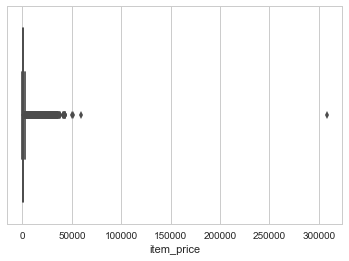

In [0]:
import seaborn as sns 
sns.set(style="whitegrid")
sns.boxplot(x=sales_train['item_price'])

There seems to be one outlier above the value 300000 in 'item_price'. Removing this outlier.

In [0]:
sales_train = sales_train[sales_train['item_price'] < 300000]
sales_train.shape

(2935848, 13)

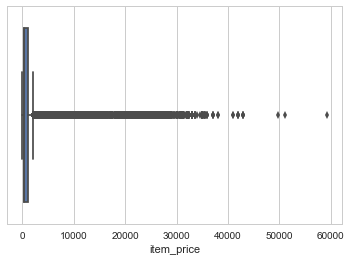

In [0]:
sns.set(style="whitegrid")
sns.boxplot(x=sales_train['item_price'])

There seems to be one outlier above the value 2000 in 'item_cnt_day'. Removing this outlier.

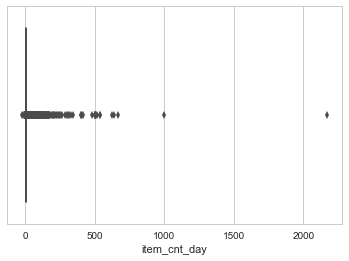

In [0]:
sns.set(style="whitegrid")
sns.boxplot(x=sales_train['item_cnt_day'])

In [0]:
sales_train = sales_train[sales_train['item_cnt_day'] < 1000]
sales_train.shape

(2935846, 13)

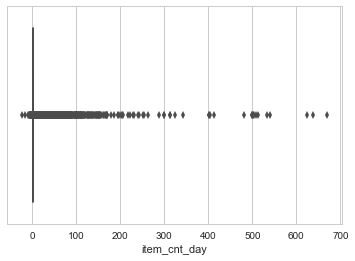

In [0]:
sns.set(style="whitegrid")
sns.boxplot(x=sales_train['item_cnt_day'])

### Creating categorical city 

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data=sales_train['city']
le.fit(data.values)
sales_train['city_cat']=le.transform(sales_train['city'])
            
sales_train.head()            

LabelEncoder()

,date,quarter,year,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category,city,item_price,item_cnt_day,city_cat
0,2013-10-12,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11574,FACTORY ORANGE (region),40,Cinema - DVD,Moscow,149.0,1.0,10
1,2013-10-07,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11568,FOR SPEECH (region),40,Cinema - DVD,Moscow,149.0,1.0,10
2,2013-10-05,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11645,PROTECTION (BD),37,Cinema - Blu-ray,Moscow,149.0,1.0,10
3,2013-10-10,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11679,MUSIC SOUNDS (BD),37,Cinema - Blu-ray,Moscow,299.0,1.0,10
4,2013-10-20,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11658,STAR WARS. EPISODE 1-3 (call) 2013,41,Cinema - Collection,Moscow,499.0,2.0,10


# Visualizing Sales Trends

1. The objective requires us to predict overall sales of the company. Data is granular date level.

2. We visualize overall sales trend across 3 years.

3. Visualize trend data for our last 4 months.

In [0]:
#Min Date
min(sales_train['date'])
#Max Date
max(sales_train['date'])

Timestamp('2013-01-01 00:00:00')

Timestamp('2015-10-31 00:00:00')

### Range of Data is between 1st of March 2013 to 31st of October 2015

### Overall sales trend across 3 years.

Text(0.5,1,'Total Sales of the company')

Text(0.5,0,'Time')

Text(0,0.5,'Sales')

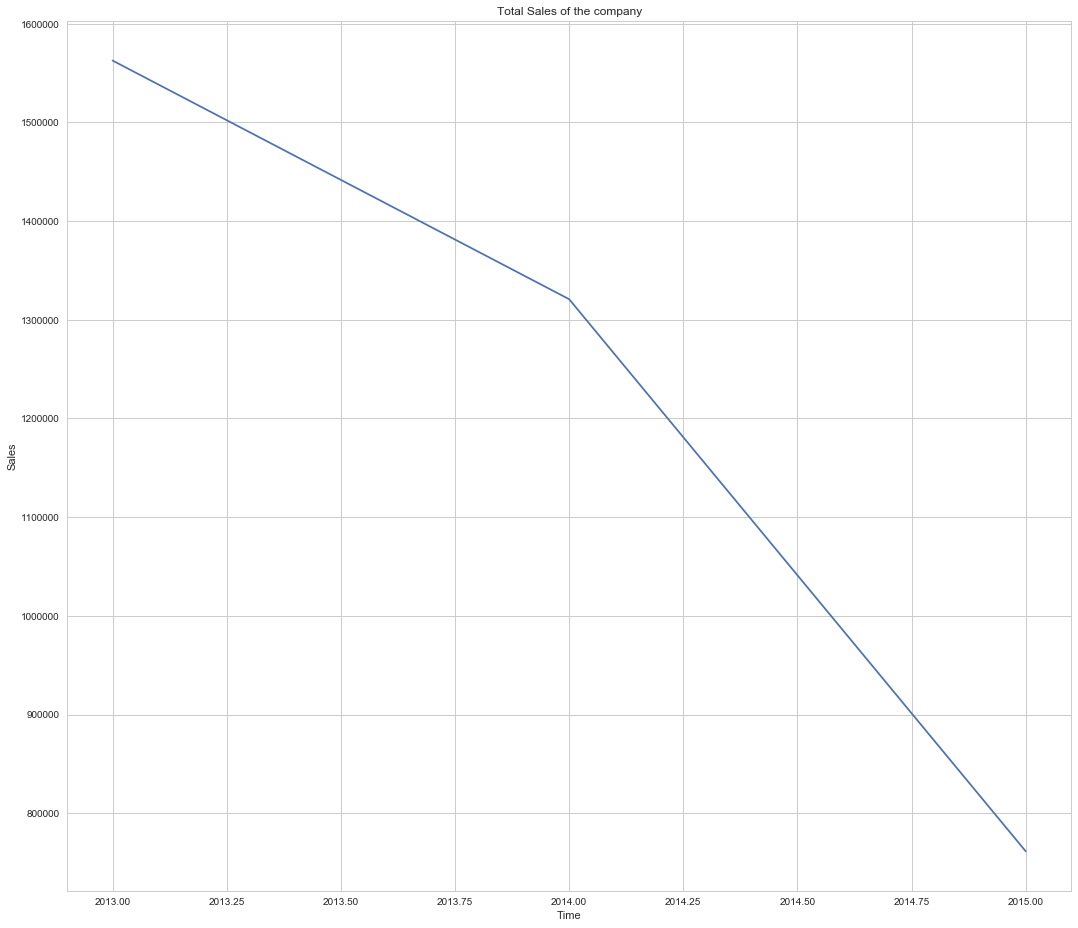

In [0]:
import datetime

# Plotting the trend of the Items sold throughout year
ts=sales_train.groupby(pd.DatetimeIndex(sales_train['date']).year)["item_cnt_day"].sum()

plt.figure(figsize=(18, 16))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)

### Overall sales trend for our last 4 months (July 1st to October 31st 2015)

Text(0.5,1,'Sales of last 4 month 2015')

Text(0.5,0,'Time')

Text(0,0.5,'Sales')

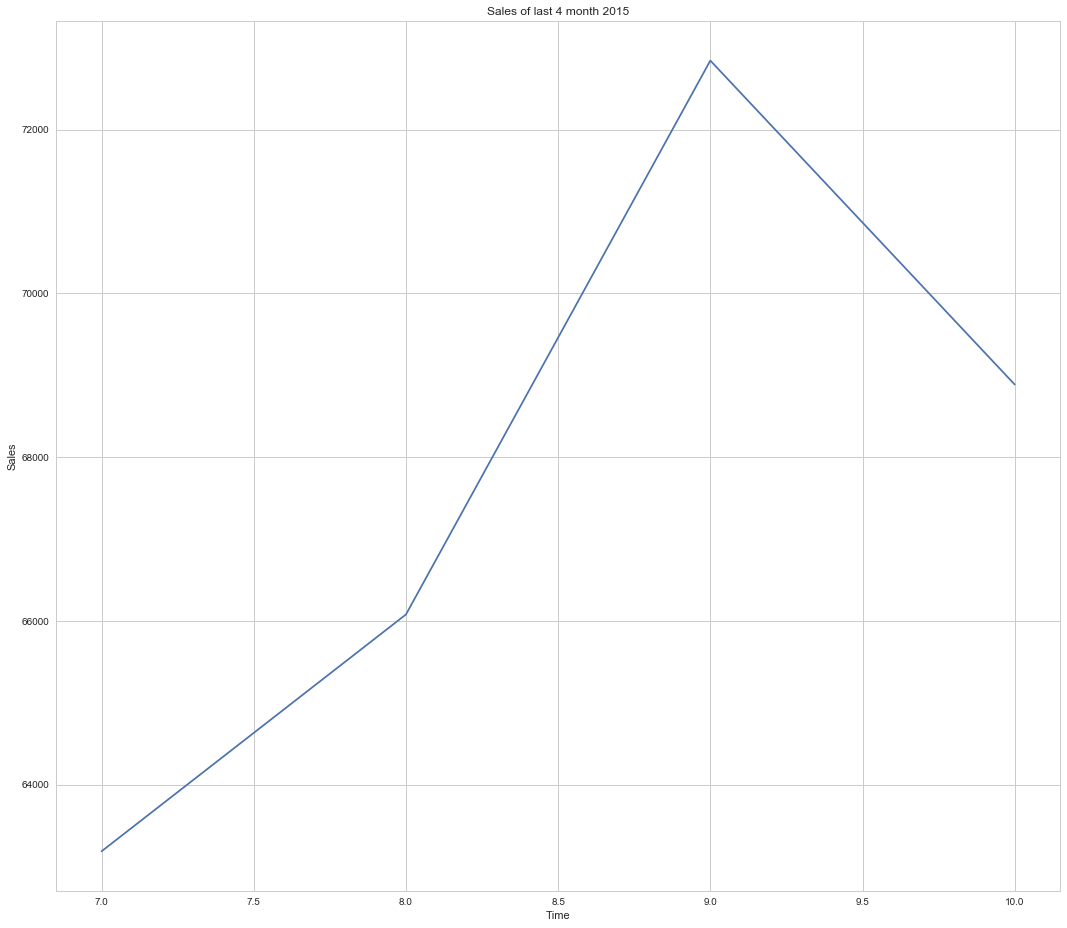

In [0]:
sales_four_months=sales_train[(sales_train['date'] >= '2015-07-01')]
fourmonth=sales_four_months.groupby(pd.DatetimeIndex(sales_four_months['date']).month)["item_cnt_day"].sum()

plt.figure(figsize=(18, 16))
plt.title('Sales of last 4 month 2015')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(fourmonth)

# Setting Predictions Objectives for Classifiers (RNN + Variations)

1. Task 1 (Univariate Analysis) We will predict the sales of five days for overall sales

2. Task 2 (Multivariate Analysis) We will predict the sales of last month of data for 2015 for all shops


1. Dataset: For overall sales We will get our results learning data last 2 months of data (day wise granduality)
2. Dataset: For last month sales of shops we will learn previous N (30 months) of data


# Preparing Data for objectives (Making train, validation and test data)

## NOTE: Creating out of samples of last 5% of our data which is removed and kept aside as validation

In [0]:
sales_train.set_index('date',inplace= True)
times=sorted(sales_train.index.values)

In [0]:
len(times)
last_5pct=times[-int(0.05*len(times))]
print("Data greater than 2015-08-09 put aside")

2935846

Data greater than 2015-08-09 put aside


In [0]:
last_5pct=times[-int(0.05*len(times))]
validation=sales_train[(sales_train.index>=last_5pct)]
validation.shape
validation.head()

sales_train_new= sales_train[(sales_train.index<last_5pct)]
sales_train_new.shape
sales_train_new.tail()

(148203, 13)

,quarter,year,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category,city,item_price,item_cnt_day,city_cat
date,,,,,,,,,,,,,
2015-08-22,3,2015,31,46,"""Sergiev Posad TC """"7Ya""""""",12805,KING LEO (region),40,Cinema - DVD,Sergiev,169.0,1.0,19
2015-08-24,3,2015,31,46,"""Sergiev Posad TC """"7Ya""""""",12830,CAT IN BOOTS (3D BD + BD),38,Cinema - Blu-ray 3D,Sergiev,199.0,1.0,19
2015-08-21,3,2015,31,46,"""Sergiev Posad TC """"7Ya""""""",13594,Purse Skyrim Dragonborn,61,Gifts - Attributes,Sergiev,2299.0,1.0,19
2015-08-15,3,2015,31,46,"""Sergiev Posad TC """"7Ya""""""",12889,CRIMATORY Grand Collection Best for the best,55,Music - Local Production CD,Sergiev,229.0,1.0,19
2015-08-22,3,2015,31,46,"""Sergiev Posad TC """"7Ya""""""",13717,Mug Ugly I Green Glass 350ml,69,Gifts - Souvenirs,Sergiev,229.0,1.0,19


(2787643, 13)

,quarter,year,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category,city,item_price,item_cnt_day,city_cat
date,,,,,,,,,,,,,
2015-08-08,3,2015,31,25,"""Moscow TRK """"Atrium""""""",13196,Kozakov Mikhail Pushkin Readings 4CD (audio-CD...,43,Books - Audiobooks,Moscow,349.0,1.0,10
2015-08-02,3,2015,31,25,"""Moscow TRK """"Atrium""""""",12723,COMEDY. Collection of films,40,Cinema - DVD,Moscow,199.0,1.0,10
2015-08-05,3,2015,31,25,"""Moscow TRK """"Atrium""""""",12473,CINEMA New collection 2,55,Music - Local Production CD,Moscow,229.0,1.0,10
2015-08-07,3,2015,31,25,"""Moscow TRK """"Atrium""""""",12528,ÐšÐ›ÐÐ¡Ð¡Ð˜ÐšÐ Wagner Wilhelm Richard Walk...,55,Music - Local Production CD,Moscow,449.0,1.0,10
2015-08-08,3,2015,31,25,"""Moscow TRK """"Atrium""""""",13120,Kipelov Best of MP3 (mp3-CD) (Jewel),57,Music - MP3,Moscow,299.0,1.0,10


In [0]:
min(validation.index)
max(sales_train_new.index)

Timestamp('2015-08-09 00:00:00')

Timestamp('2015-08-08 00:00:00')

## Task 1 (Univariate Analysis Sales): Preparing data for overall sales (GRANULARITY DAY WISE)

Our relevant columns become date and item_cnt_day (number of products sold on date)

In [0]:
t1= sales_train_new.loc[:,['item_cnt_day']]
t1.shape
t1.tail()

(2787643, 1)

,item_cnt_day
date,
2015-08-08,1.0
2015-08-02,1.0
2015-08-05,1.0
2015-08-07,1.0
2015-08-08,1.0


### Grouping data to day wise sales from shopwise sales 

In [0]:
t1.reset_index(inplace=True)
t1_group = t1.groupby([t1.date.apply(lambda x: x.strftime('%Y-%m-%d'))]).sum().reset_index()

In [0]:
t1_group.head(5)
t1_group.tail(5)
t1_group.shape

,date,item_cnt_day
0,2013-01-01,1951.0
1,2013-01-02,8198.0
2,2013-01-03,7422.0
3,2013-01-04,6617.0
4,2013-01-05,6346.0


,date,item_cnt_day
945,2015-08-04,1642.0
946,2015-08-05,1560.0
947,2015-08-06,1764.0
948,2015-08-07,1972.0
949,2015-08-08,2179.0


(950, 2)

1. So we now have Total data grouped to daily sales from 1st of January 2013 - 8th August 2015 
2. We have validation data set removed which is all data greater than 9th August 2015 - 31st of October 2015

## DEFINING THINGS FOR OUR Univariate Analysis Task 1:

1. SEQUENCE THAT WE WILL USE FOR PREDICTION WHICH IS HOW MUCH PREVIOUS DAYS WE WILL USE TO LEARN (60 DAYS)
2. FUTURE PERIOD THAT WE WILL PREDICT WHICH IS HOW MANY DAYS WILL WE PREDICT (5 DAYS USING LSTM)

In [0]:
#days
t1_seq_length= 60
t1_future_predict_period= 5
t1_group.set_index('date',inplace= True)

## Making training and test set

### Training Data: Last 60 Days (5th of June to 3rd  of August)

In [0]:
x= t1_group['2015-06-05' :'2015-08-03']
#Contains 60 days of data
x.shape
#Item_cnt_day is the Sales
x.tail()

(60, 1)

,item_cnt_day
date,
2015-07-30,1720.0
2015-07-31,1796.0
2015-08-01,1953.0
2015-08-02,1771.0
2015-08-03,1659.0


### Test Data: Last 5 days (4th to 8th of August 2015)

In [0]:
# 2 Months training 1 Day test 
y=t1_group['2015-08-04':]
#Contains 1 day of data that we want to predict
y.shape

y.head()

(5, 1)

,item_cnt_day
date,
2015-08-04,1642.0
2015-08-05,1560.0
2015-08-06,1764.0
2015-08-07,1972.0
2015-08-08,2179.0


### Preparing Day+1 to Day+5 predictions of Training Data

In [0]:
#We prepare the training data of one day showing next 5 days prediction T_1/ T_2/ .. etc
for i in range(0,t1_future_predict_period):
    x["T_" + str(i+1)] = x.item_cnt_day.shift(-i)
x.fillna(0.0, inplace=True)

x.head()
x.shape


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,item_cnt_day,T_1,T_2,T_3,T_4,T_5
date,,,,,,
2015-06-05,2295.0,2295.0,2448.0,2096.0,1708.0,2026.0
2015-06-06,2448.0,2448.0,2096.0,1708.0,2026.0,2140.0
2015-06-07,2096.0,2096.0,1708.0,2026.0,2140.0,2623.0
2015-06-08,1708.0,1708.0,2026.0,2140.0,2623.0,2690.0
2015-06-09,2026.0,2026.0,2140.0,2623.0,2690.0,2235.0


(60, 6)

In [0]:
# Rearraning training data 
training = x[['T_1','T_2','T_3','T_4','T_5', 'item_cnt_day']].reset_index()
training=training.drop(["date"],axis=1)
training.tail()

,T_1,T_2,T_3,T_4,T_5,item_cnt_day
55,1720.0,1796.0,1953.0,1771.0,1659.0,1720.0
56,1796.0,1953.0,1771.0,1659.0,0.0,1796.0
57,1953.0,1771.0,1659.0,0.0,0.0,1953.0
58,1771.0,1659.0,0.0,0.0,0.0,1771.0
59,1659.0,0.0,0.0,0.0,0.0,1659.0


### Preparing Day+1 to Day+5 predictions of Test Data

In [0]:
for i in range(0,t1_future_predict_period):
    y["T_" + str(i+1)] = y.item_cnt_day.shift(-i)
y.fillna(0.0, inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [0]:
# Rearraning training data 
test = y[['T_1','T_2','T_3','T_4','T_5', 'item_cnt_day']].reset_index()
test=test.drop(["date"],axis=1)
test.head()

,T_1,T_2,T_3,T_4,T_5,item_cnt_day
0,1642.0,1560.0,1764.0,1972.0,2179.0,1642.0
1,1560.0,1764.0,1972.0,2179.0,0.0,1560.0
2,1764.0,1972.0,2179.0,0.0,0.0,1764.0
3,1972.0,2179.0,0.0,0.0,0.0,1972.0
4,2179.0,0.0,0.0,0.0,0.0,2179.0


## Scaling training and test data 

In [0]:
# Reshape the data between -1 and 1 and to 3D
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()

In [0]:
training.shape
training.head()

scaled_train= pd.DataFrame(scaler.fit_transform(training.iloc[:,0:6]))
scaled_train.head()
scaled_train.shape


(60, 6)

,T_1,T_2,T_3,T_4,T_5,item_cnt_day
0,2295.0,2448.0,2096.0,1708.0,2026.0,2295.0
1,2448.0,2096.0,1708.0,2026.0,2140.0,2448.0
2,2096.0,1708.0,2026.0,2140.0,2623.0,2096.0
3,1708.0,2026.0,2140.0,2623.0,2690.0,1708.0
4,2026.0,2140.0,2623.0,2690.0,2235.0,2026.0


,0,1,2,3,4,5
0,0.732062,1.027045,0.189835,-0.497600,0.139179,0.732062
1,1.269560,0.122416,-0.643063,0.100347,0.333067,1.269560
2,0.032964,-0.874732,0.039570,0.314706,1.154537,0.032964
3,-1.330101,-0.057482,0.284287,1.222910,1.268489,-1.330101
4,-0.212950,0.235495,1.321116,1.348892,0.494640,-0.212950


(60, 6)

In [0]:
test.shape
test.head()

scaled_test= pd.DataFrame(scaler.fit_transform(test.iloc[:,0:6]))
scaled_test.head()
scaled_test.shape

(5, 6)

,T_1,T_2,T_3,T_4,T_5,item_cnt_day
0,1642.0,1560.0,1764.0,1972.0,2179.0,1642.0
1,1560.0,1764.0,1972.0,2179.0,0.0,1560.0
2,1764.0,1972.0,2179.0,0.0,0.0,1764.0
3,1972.0,2179.0,0.0,0.0,0.0,1972.0
4,2179.0,0.0,0.0,0.0,0.0,2179.0


,0,1,2,3,4,5
0,-0.804283,0.083817,0.596026,1.120633,2.0,-0.804283
1,-1.167851,0.346873,0.809405,1.323796,-0.5,-1.167851
2,-0.263365,0.615088,1.021759,-0.814810,-0.5,-0.263365
3,0.658856,0.882012,-1.213595,-0.814810,-0.5,0.658856
4,1.576643,-1.927790,-1.213595,-0.814810,-0.5,1.576643


(5, 6)

In [0]:
scaled_train.iloc[:,0:-1].shape
scaled_test.iloc[:,0:-1]

(60, 5)

,0,1,2,3,4
0,-0.804283,0.083817,0.596026,1.120633,2.0
1,-1.167851,0.346873,0.809405,1.323796,-0.5
2,-0.263365,0.615088,1.021759,-0.814810,-0.5
3,0.658856,0.882012,-1.213595,-0.814810,-0.5
4,1.576643,-1.927790,-1.213595,-0.814810,-0.5


In [0]:
x_train=scaled_train.iloc[:,0:-1]
x_train.head()
x_train.shape

y_train=scaled_train.iloc[:,-1]
y_train.head()
y_train.shape

x_test=scaled_test.iloc[:,0:-1]
x_test.head()
x_test.shape

y_test=scaled_test.iloc[:,-1]
y_test.head()
y_test.shape

,0,1,2,3,4
0,0.732062,1.027045,0.189835,-0.497600,0.139179
1,1.269560,0.122416,-0.643063,0.100347,0.333067
2,0.032964,-0.874732,0.039570,0.314706,1.154537
3,-1.330101,-0.057482,0.284287,1.222910,1.268489
4,-0.212950,0.235495,1.321116,1.348892,0.494640


(60, 5)

0    0.732062
1    1.269560
2    0.032964
3   -1.330101
4   -0.212950
Name: 5, dtype: float64

(60,)

,0,1,2,3,4
0,-0.804283,0.083817,0.596026,1.120633,2.0
1,-1.167851,0.346873,0.809405,1.323796,-0.5
2,-0.263365,0.615088,1.021759,-0.814810,-0.5
3,0.658856,0.882012,-1.213595,-0.814810,-0.5
4,1.576643,-1.927790,-1.213595,-0.814810,-0.5


(5, 5)

0   -0.804283
1   -1.167851
2   -0.263365
3    0.658856
4    1.576643
Name: 5, dtype: float64

(5,)

### Reshaping Data

In [0]:
x_train_array= x_train.values
y_train_array=y_train.values
x_test_array=x_test.values

In [0]:
x_train_reshaped=x_train_array.reshape(x_train_array.shape[0],1,x_train_array.shape[1])
x_train_reshaped.shape
x_test_reshaped=x_test_array.reshape(x_test_array.shape[0],1,x_test_array.shape[1])
x_test_reshaped.shape

(60, 1, 5)

(5, 1, 5)

## Baseline Model Building

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, ThresholdedReLU, MaxPooling2D, Embedding, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras import backend as K

from keras.callbacks import EarlyStopping

model_lstm = Sequential()

model_lstm.add(LSTM(5, batch_input_shape= (1,x_train_reshaped.shape[1],x_train_reshaped.shape[2]),activation='relu',return_sequences=False))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(5))
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (1, 5)                    220       
_________________________________________________________________
dropout_3 (Dropout)          (1, 5)                    0         
_________________________________________________________________
dense_3 (Dense)              (1, 5)                    30        
_________________________________________________________________
dropout_4 (Dropout)          (1, 5)                    0         
_________________________________________________________________
dense_4 (Dense)              (1, 1)                    6         
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model_lstm.fit(x_train_reshaped,y_train_array,epochs=10, batch_size=1, verbose=0, shuffle=False)
print("done")

done


In [0]:
y_predict = model_lstm.predict(x_test_reshaped)
y_predict

array([[ 0.00781727],
       [-0.25223434],
       [-0.10746839],
       [ 0.11092602],
       [ 0.2734627 ]], dtype=float32)

## Evaluation for Task 1

In [0]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt
rmse = sqrt(mean_squared_error(y_test,y_predict))
print('Val RMSE: %.3f' % rmse)

Val RMSE: 0.693


### Converting from scaled to actual value of sales

In [0]:
scaled_test.shape
scaled_test
ypred_df=pd.DataFrame(y_predict)
ypred_df

(5, 6)

,0,1,2,3,4,5
0,-0.804283,0.083817,0.596026,1.120633,2.0,-0.804283
1,-1.167851,0.346873,0.809405,1.323796,-0.5,-1.167851
2,-0.263365,0.615088,1.021759,-0.814810,-0.5,-0.263365
3,0.658856,0.882012,-1.213595,-0.814810,-0.5,0.658856
4,1.576643,-1.927790,-1.213595,-0.814810,-0.5,1.576643


,0
0,-0.194259
1,-0.629223
2,-0.119240
3,0.354066
4,0.303113


In [0]:
array=pd.concat([scaled_test.iloc[:,0:-1], ypred_df], axis=1)
inverted = pd.DataFrame(scaler.inverse_transform(array))
inverted


,0,1,2,3,4,5
0,1642.0,1560.0,1764.0,1972.0,2179.0,1779.586273
1,1560.0,1764.0,1972.0,2179.0,0.0,1681.483364
2,1764.0,1972.0,2179.0,0.0,0.0,1796.506243
3,1972.0,2179.0,0.0,0.0,0.0,1903.256964
4,2179.0,0.0,0.0,0.0,0.0,1891.764928


In [0]:
inverted.iloc[:,-1]
y_old=y
y_old.reset_index(inplace=True)

0    1779.586273
1    1681.483364
2    1796.506243
3    1903.256964
4    1891.764928
Name: 5, dtype: float64

In [0]:
final_df=pd.concat([y_old,inverted.iloc[:,-1]], axis=1)
final_df.head()

,date,item_cnt_day,T_1,T_2,T_3,T_4,T_5,5
0,2015-08-04,1642.0,1642.0,1560.0,1764.0,1972.0,2179.0,1779.586273
1,2015-08-05,1560.0,1560.0,1764.0,1972.0,2179.0,0.0,1681.483364
2,2015-08-06,1764.0,1764.0,1972.0,2179.0,0.0,0.0,1796.506243
3,2015-08-07,1972.0,1972.0,2179.0,0.0,0.0,0.0,1903.256964
4,2015-08-08,2179.0,2179.0,0.0,0.0,0.0,0.0,1891.764928


Text(0.5,1,'LSTM Prediction vs Actual Sales for 5 days between 4th - 8th of August 2015')

Text(0.5,0,'Dates')

([<matplotlib.axis.XTick at 0x1f4cde18b00>,
 <a list of 5 Text xticklabel objects>)

(array([1500., 1600., 1700., 1800., 1900., 2000., 2100., 2200., 2300.]),
 <a list of 9 Text yticklabel objects>)

Text(0,0.5,'Sales of next 5 days')

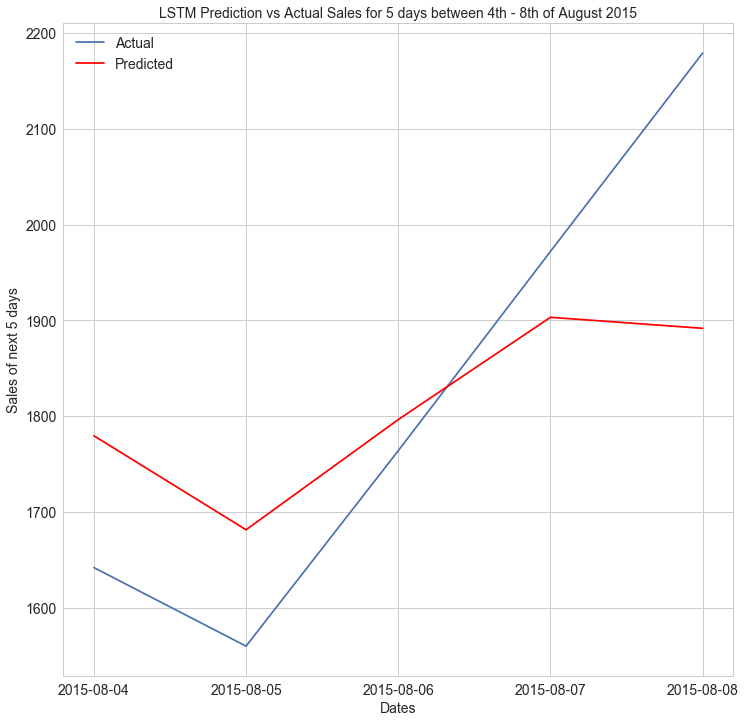

In [0]:
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(final_df['date'], final_df.item_cnt_day, label='Actual')
ax.plot(final_df['date'], final_df.iloc[:,-1], label='Predicted',color='red',)
plt.title('LSTM Prediction vs Actual Sales for 5 days between 4th - 8th of August 2015',fontsize=14)
plt.xlabel('Dates',fontsize=14)
plt.xticks(final_df['date'],fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Sales of next 5 days',fontsize=14)
ax.legend(fontsize=14)
plt.show()

## Performing hyperparameter tuning to improve results

## 1. Tuning optimizer

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

optimizer = ['sgd', 'rmsprop', 'adagrad', 'adadelta', 'adam', 'adamax', 'nadam']
results=[]
concat_result=[]

for j in range(0,20):
    for i in range(len(optimizer)):
        
        # create model
        model_opt = Sequential()
        model_opt.add(LSTM(5, batch_input_shape= (1,x_train_reshaped.shape[1],x_train_reshaped.shape[2]),activation='relu',return_sequences=False))
        model_opt.add(Dropout(0.2))
        model_opt.add(Dense(5))
        model_opt.add(Dropout(0.1))
        model_opt.add(Dense(1))
        # Compile model
        model_opt.compile(loss='mean_squared_error', optimizer=optimizer[i], metrics=['accuracy'])

        history = model_opt.fit(x_train_reshaped,y_train_array,epochs=10, batch_size=1, verbose=0, shuffle=False)

        y_predict = model_opt.predict(x_test_reshaped)
        rmse = sqrt(mean_squared_error(y_test,y_predict))
        
        # Create a column from the list
        
        
        results.append(round(rmse,3)) 
        
    if(j==0):
        concat_result=pd.DataFrame(results)
        results=[]
    else:
        results=pd.DataFrame(results)
        concat_result=pd.concat([concat_result, results],axis=1)
        results=[]
        
    concat_result
        
        

,0
0,0.567
1,0.785
2,0.898
3,0.770
4,0.542
5,0.976
6,0.476


,0,0
0,0.567,0.472
1,0.785,0.725
2,0.898,0.791
3,0.770,1.003
4,0.542,0.722
5,0.976,1.001
6,0.476,0.326


,0,0,0
0,0.567,0.472,0.430
1,0.785,0.725,0.612
2,0.898,0.791,0.606
3,0.770,1.003,0.843
4,0.542,0.722,0.777
5,0.976,1.001,0.957
6,0.476,0.326,0.406


,0,0,0,0
0,0.567,0.472,0.430,0.646
1,0.785,0.725,0.612,0.942
2,0.898,0.791,0.606,0.725
3,0.770,1.003,0.843,0.972
4,0.542,0.722,0.777,0.933
5,0.976,1.001,0.957,1.019
6,0.476,0.326,0.406,0.649


,0,0,0,0,0
0,0.567,0.472,0.430,0.646,0.548
1,0.785,0.725,0.612,0.942,0.986
2,0.898,0.791,0.606,0.725,0.730
3,0.770,1.003,0.843,0.972,1.022
4,0.542,0.722,0.777,0.933,0.531
5,0.976,1.001,0.957,1.019,1.058
6,0.476,0.326,0.406,0.649,0.203


,0,0,0,0,0,0
0,0.567,0.472,0.430,0.646,0.548,0.729
1,0.785,0.725,0.612,0.942,0.986,0.755
2,0.898,0.791,0.606,0.725,0.730,0.814
3,0.770,1.003,0.843,0.972,1.022,0.988
4,0.542,0.722,0.777,0.933,0.531,0.790
5,0.976,1.001,0.957,1.019,1.058,0.755
6,0.476,0.326,0.406,0.649,0.203,0.635


,0,0,0,0,0,0,0
0,0.567,0.472,0.430,0.646,0.548,0.729,0.552
1,0.785,0.725,0.612,0.942,0.986,0.755,0.873
2,0.898,0.791,0.606,0.725,0.730,0.814,0.791
3,0.770,1.003,0.843,0.972,1.022,0.988,0.867
4,0.542,0.722,0.777,0.933,0.531,0.790,0.747
5,0.976,1.001,0.957,1.019,1.058,0.755,1.016
6,0.476,0.326,0.406,0.649,0.203,0.635,0.647


,0,0,0,0,0,0,0,0
0,0.567,0.472,0.430,0.646,0.548,0.729,0.552,0.598
1,0.785,0.725,0.612,0.942,0.986,0.755,0.873,0.739
2,0.898,0.791,0.606,0.725,0.730,0.814,0.791,0.600
3,0.770,1.003,0.843,0.972,1.022,0.988,0.867,0.846
4,0.542,0.722,0.777,0.933,0.531,0.790,0.747,0.967
5,0.976,1.001,0.957,1.019,1.058,0.755,1.016,0.825
6,0.476,0.326,0.406,0.649,0.203,0.635,0.647,1.126


,0,0,0,0,0,0,0,0,0
0,0.567,0.472,0.430,0.646,0.548,0.729,0.552,0.598,0.512
1,0.785,0.725,0.612,0.942,0.986,0.755,0.873,0.739,0.865
2,0.898,0.791,0.606,0.725,0.730,0.814,0.791,0.600,0.846
3,0.770,1.003,0.843,0.972,1.022,0.988,0.867,0.846,0.860
4,0.542,0.722,0.777,0.933,0.531,0.790,0.747,0.967,0.637
5,0.976,1.001,0.957,1.019,1.058,0.755,1.016,0.825,0.889
6,0.476,0.326,0.406,0.649,0.203,0.635,0.647,1.126,0.336


,0,0,0,0,0,0,0,0,0,0
0,0.567,0.472,0.430,0.646,0.548,0.729,0.552,0.598,0.512,0.496
1,0.785,0.725,0.612,0.942,0.986,0.755,0.873,0.739,0.865,0.776
2,0.898,0.791,0.606,0.725,0.730,0.814,0.791,0.600,0.846,1.044
3,0.770,1.003,0.843,0.972,1.022,0.988,0.867,0.846,0.860,0.876
4,0.542,0.722,0.777,0.933,0.531,0.790,0.747,0.967,0.637,0.667
5,0.976,1.001,0.957,1.019,1.058,0.755,1.016,0.825,0.889,0.877
6,0.476,0.326,0.406,0.649,0.203,0.635,0.647,1.126,0.336,0.629


,0,0,0,0,0,0,0,0,0,0,0
0,0.567,0.472,0.430,0.646,0.548,0.729,0.552,0.598,0.512,0.496,0.615
1,0.785,0.725,0.612,0.942,0.986,0.755,0.873,0.739,0.865,0.776,0.826
2,0.898,0.791,0.606,0.725,0.730,0.814,0.791,0.600,0.846,1.044,0.904
3,0.770,1.003,0.843,0.972,1.022,0.988,0.867,0.846,0.860,0.876,0.913
4,0.542,0.722,0.777,0.933,0.531,0.790,0.747,0.967,0.637,0.667,0.724
5,0.976,1.001,0.957,1.019,1.058,0.755,1.016,0.825,0.889,0.877,1.021
6,0.476,0.326,0.406,0.649,0.203,0.635,0.647,1.126,0.336,0.629,0.416


,0,0,0,0,0,0,0,0,0,0,0,0
0,0.567,0.472,0.430,0.646,0.548,0.729,0.552,0.598,0.512,0.496,0.615,0.484
1,0.785,0.725,0.612,0.942,0.986,0.755,0.873,0.739,0.865,0.776,0.826,0.838
2,0.898,0.791,0.606,0.725,0.730,0.814,0.791,0.600,0.846,1.044,0.904,0.849
3,0.770,1.003,0.843,0.972,1.022,0.988,0.867,0.846,0.860,0.876,0.913,0.982
4,0.542,0.722,0.777,0.933,0.531,0.790,0.747,0.967,0.637,0.667,0.724,0.659
5,0.976,1.001,0.957,1.019,1.058,0.755,1.016,0.825,0.889,0.877,1.021,0.891
6,0.476,0.326,0.406,0.649,0.203,0.635,0.647,1.126,0.336,0.629,0.416,0.731


,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.567,0.472,0.430,0.646,0.548,0.729,0.552,0.598,0.512,0.496,0.615,0.484,0.574
1,0.785,0.725,0.612,0.942,0.986,0.755,0.873,0.739,0.865,0.776,0.826,0.838,0.817
2,0.898,0.791,0.606,0.725,0.730,0.814,0.791,0.600,0.846,1.044,0.904,0.849,0.966
3,0.770,1.003,0.843,0.972,1.022,0.988,0.867,0.846,0.860,0.876,0.913,0.982,0.872
4,0.542,0.722,0.777,0.933,0.531,0.790,0.747,0.967,0.637,0.667,0.724,0.659,0.879
5,0.976,1.001,0.957,1.019,1.058,0.755,1.016,0.825,0.889,0.877,1.021,0.891,0.948
6,0.476,0.326,0.406,0.649,0.203,0.635,0.647,1.126,0.336,0.629,0.416,0.731,0.677


,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.567,0.472,0.430,0.646,0.548,0.729,0.552,0.598,0.512,0.496,0.615,0.484,0.574,0.545
1,0.785,0.725,0.612,0.942,0.986,0.755,0.873,0.739,0.865,0.776,0.826,0.838,0.817,0.796
2,0.898,0.791,0.606,0.725,0.730,0.814,0.791,0.600,0.846,1.044,0.904,0.849,0.966,0.942
3,0.770,1.003,0.843,0.972,1.022,0.988,0.867,0.846,0.860,0.876,0.913,0.982,0.872,0.675
4,0.542,0.722,0.777,0.933,0.531,0.790,0.747,0.967,0.637,0.667,0.724,0.659,0.879,0.692
5,0.976,1.001,0.957,1.019,1.058,0.755,1.016,0.825,0.889,0.877,1.021,0.891,0.948,0.935
6,0.476,0.326,0.406,0.649,0.203,0.635,0.647,1.126,0.336,0.629,0.416,0.731,0.677,0.434


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.567,0.472,0.430,0.646,0.548,0.729,0.552,0.598,0.512,0.496,0.615,0.484,0.574,0.545,0.557
1,0.785,0.725,0.612,0.942,0.986,0.755,0.873,0.739,0.865,0.776,0.826,0.838,0.817,0.796,0.701
2,0.898,0.791,0.606,0.725,0.730,0.814,0.791,0.600,0.846,1.044,0.904,0.849,0.966,0.942,0.766
3,0.770,1.003,0.843,0.972,1.022,0.988,0.867,0.846,0.860,0.876,0.913,0.982,0.872,0.675,1.066
4,0.542,0.722,0.777,0.933,0.531,0.790,0.747,0.967,0.637,0.667,0.724,0.659,0.879,0.692,0.814
5,0.976,1.001,0.957,1.019,1.058,0.755,1.016,0.825,0.889,0.877,1.021,0.891,0.948,0.935,0.961
6,0.476,0.326,0.406,0.649,0.203,0.635,0.647,1.126,0.336,0.629,0.416,0.731,0.677,0.434,0.266


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.567,0.472,0.430,0.646,0.548,0.729,0.552,0.598,0.512,0.496,0.615,0.484,0.574,0.545,0.557,0.687
1,0.785,0.725,0.612,0.942,0.986,0.755,0.873,0.739,0.865,0.776,0.826,0.838,0.817,0.796,0.701,0.738
2,0.898,0.791,0.606,0.725,0.730,0.814,0.791,0.600,0.846,1.044,0.904,0.849,0.966,0.942,0.766,0.737
3,0.770,1.003,0.843,0.972,1.022,0.988,0.867,0.846,0.860,0.876,0.913,0.982,0.872,0.675,1.066,0.814
4,0.542,0.722,0.777,0.933,0.531,0.790,0.747,0.967,0.637,0.667,0.724,0.659,0.879,0.692,0.814,0.606
5,0.976,1.001,0.957,1.019,1.058,0.755,1.016,0.825,0.889,0.877,1.021,0.891,0.948,0.935,0.961,0.966
6,0.476,0.326,0.406,0.649,0.203,0.635,0.647,1.126,0.336,0.629,0.416,0.731,0.677,0.434,0.266,0.407


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.567,0.472,0.430,0.646,0.548,0.729,0.552,0.598,0.512,0.496,0.615,0.484,0.574,0.545,0.557,0.687,0.588
1,0.785,0.725,0.612,0.942,0.986,0.755,0.873,0.739,0.865,0.776,0.826,0.838,0.817,0.796,0.701,0.738,0.785
2,0.898,0.791,0.606,0.725,0.730,0.814,0.791,0.600,0.846,1.044,0.904,0.849,0.966,0.942,0.766,0.737,0.927
3,0.770,1.003,0.843,0.972,1.022,0.988,0.867,0.846,0.860,0.876,0.913,0.982,0.872,0.675,1.066,0.814,1.001
4,0.542,0.722,0.777,0.933,0.531,0.790,0.747,0.967,0.637,0.667,0.724,0.659,0.879,0.692,0.814,0.606,0.693
5,0.976,1.001,0.957,1.019,1.058,0.755,1.016,0.825,0.889,0.877,1.021,0.891,0.948,0.935,0.961,0.966,0.909
6,0.476,0.326,0.406,0.649,0.203,0.635,0.647,1.126,0.336,0.629,0.416,0.731,0.677,0.434,0.266,0.407,0.516


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.567,0.472,0.430,0.646,0.548,0.729,0.552,0.598,0.512,0.496,0.615,0.484,0.574,0.545,0.557,0.687,0.588,0.385
1,0.785,0.725,0.612,0.942,0.986,0.755,0.873,0.739,0.865,0.776,0.826,0.838,0.817,0.796,0.701,0.738,0.785,0.515
2,0.898,0.791,0.606,0.725,0.730,0.814,0.791,0.600,0.846,1.044,0.904,0.849,0.966,0.942,0.766,0.737,0.927,0.796
3,0.770,1.003,0.843,0.972,1.022,0.988,0.867,0.846,0.860,0.876,0.913,0.982,0.872,0.675,1.066,0.814,1.001,0.913
4,0.542,0.722,0.777,0.933,0.531,0.790,0.747,0.967,0.637,0.667,0.724,0.659,0.879,0.692,0.814,0.606,0.693,0.865
5,0.976,1.001,0.957,1.019,1.058,0.755,1.016,0.825,0.889,0.877,1.021,0.891,0.948,0.935,0.961,0.966,0.909,0.975
6,0.476,0.326,0.406,0.649,0.203,0.635,0.647,1.126,0.336,0.629,0.416,0.731,0.677,0.434,0.266,0.407,0.516,0.531


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.567,0.472,0.430,0.646,0.548,0.729,0.552,0.598,0.512,0.496,0.615,0.484,0.574,0.545,0.557,0.687,0.588,0.385,0.634
1,0.785,0.725,0.612,0.942,0.986,0.755,0.873,0.739,0.865,0.776,0.826,0.838,0.817,0.796,0.701,0.738,0.785,0.515,1.045
2,0.898,0.791,0.606,0.725,0.730,0.814,0.791,0.600,0.846,1.044,0.904,0.849,0.966,0.942,0.766,0.737,0.927,0.796,0.892
3,0.770,1.003,0.843,0.972,1.022,0.988,0.867,0.846,0.860,0.876,0.913,0.982,0.872,0.675,1.066,0.814,1.001,0.913,0.756
4,0.542,0.722,0.777,0.933,0.531,0.790,0.747,0.967,0.637,0.667,0.724,0.659,0.879,0.692,0.814,0.606,0.693,0.865,0.694
5,0.976,1.001,0.957,1.019,1.058,0.755,1.016,0.825,0.889,0.877,1.021,0.891,0.948,0.935,0.961,0.966,0.909,0.975,0.850
6,0.476,0.326,0.406,0.649,0.203,0.635,0.647,1.126,0.336,0.629,0.416,0.731,0.677,0.434,0.266,0.407,0.516,0.531,0.517


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.567,0.472,0.430,0.646,0.548,0.729,0.552,0.598,0.512,0.496,0.615,0.484,0.574,0.545,0.557,0.687,0.588,0.385,0.634,0.671
1,0.785,0.725,0.612,0.942,0.986,0.755,0.873,0.739,0.865,0.776,0.826,0.838,0.817,0.796,0.701,0.738,0.785,0.515,1.045,0.758
2,0.898,0.791,0.606,0.725,0.730,0.814,0.791,0.600,0.846,1.044,0.904,0.849,0.966,0.942,0.766,0.737,0.927,0.796,0.892,0.584
3,0.770,1.003,0.843,0.972,1.022,0.988,0.867,0.846,0.860,0.876,0.913,0.982,0.872,0.675,1.066,0.814,1.001,0.913,0.756,0.952
4,0.542,0.722,0.777,0.933,0.531,0.790,0.747,0.967,0.637,0.667,0.724,0.659,0.879,0.692,0.814,0.606,0.693,0.865,0.694,0.690
5,0.976,1.001,0.957,1.019,1.058,0.755,1.016,0.825,0.889,0.877,1.021,0.891,0.948,0.935,0.961,0.966,0.909,0.975,0.850,1.094
6,0.476,0.326,0.406,0.649,0.203,0.635,0.647,1.126,0.336,0.629,0.416,0.731,0.677,0.434,0.266,0.407,0.516,0.531,0.517,0.298


In [0]:
concat_result.mean(axis=1)
concat_result.std(axis=1)

0    0.56450
1    0.79385
2    0.81040
3    0.89955
4    0.73145
5    0.94615
6    0.51130
dtype: float64

0    0.086713
1    0.119292
2    0.124592
3    0.100475
4    0.118033
5    0.082296
6    0.208328
dtype: float64

SGD is best optimizer for the problem


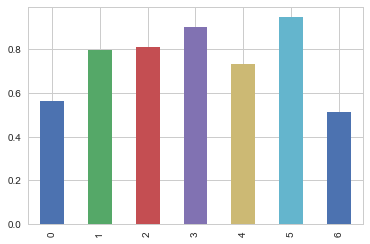

In [0]:
concat_result.mean(axis=1).plot(kind='bar')
print("SGD is best optimizer for the problem")

## 2. Tuning Number of EPOCHS

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

epochs = [10,50,100,200]
results_epochs=[]
concat_result_epochs=[]

for j in range(0,20):
    for i in range(len(epochs)):
        
        # create model
        model_eph = Sequential()
        model_eph.add(LSTM(5, batch_input_shape= (1,x_train_reshaped.shape[1],x_train_reshaped.shape[2]),activation='relu',return_sequences=False))
        model_eph.add(Dropout(0.2))
        model_eph.add(Dense(5))
        model_eph.add(Dropout(0.1))
        model_eph.add(Dense(1))
        # Compile model
        model_eph.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

        history = model_eph.fit(x_train_reshaped,y_train_array,epochs=epochs[i], batch_size=1, verbose=0, shuffle=False)

        y_predict = model_eph.predict(x_test_reshaped)
        rmse = sqrt(mean_squared_error(y_test,y_predict))
        
        # Create a column from the list
        
        
        results_epochs.append(round(rmse,3)) 
        
    if(j==0):
        concat_result_epochs=pd.DataFrame(results_epochs)
        results_epochs=[]
    else:
        results_epochs=pd.DataFrame(results_epochs)
        concat_result_epochs=pd.concat([concat_result_epochs, results_epochs],axis=1)
        results_epochs=[]
        
    concat_result_epochs
        
        

,0
0,0.576
1,0.405
2,0.275
3,0.308


,0,0
0,0.576,0.476
1,0.405,0.431
2,0.275,0.257
3,0.308,0.271


,0,0,0
0,0.576,0.476,0.524
1,0.405,0.431,0.198
2,0.275,0.257,0.267
3,0.308,0.271,0.254


,0,0,0,0
0,0.576,0.476,0.524,0.599
1,0.405,0.431,0.198,0.298
2,0.275,0.257,0.267,0.237
3,0.308,0.271,0.254,0.199


,0,0,0,0,0
0,0.576,0.476,0.524,0.599,0.472
1,0.405,0.431,0.198,0.298,0.310
2,0.275,0.257,0.267,0.237,0.259
3,0.308,0.271,0.254,0.199,0.219


,0,0,0,0,0,0
0,0.576,0.476,0.524,0.599,0.472,0.626
1,0.405,0.431,0.198,0.298,0.310,0.130
2,0.275,0.257,0.267,0.237,0.259,0.342
3,0.308,0.271,0.254,0.199,0.219,0.155


,0,0,0,0,0,0,0
0,0.576,0.476,0.524,0.599,0.472,0.626,0.596
1,0.405,0.431,0.198,0.298,0.310,0.130,0.215
2,0.275,0.257,0.267,0.237,0.259,0.342,0.259
3,0.308,0.271,0.254,0.199,0.219,0.155,0.101


,0,0,0,0,0,0,0,0
0,0.576,0.476,0.524,0.599,0.472,0.626,0.596,0.597
1,0.405,0.431,0.198,0.298,0.310,0.130,0.215,0.285
2,0.275,0.257,0.267,0.237,0.259,0.342,0.259,0.183
3,0.308,0.271,0.254,0.199,0.219,0.155,0.101,0.237


,0,0,0,0,0,0,0,0,0
0,0.576,0.476,0.524,0.599,0.472,0.626,0.596,0.597,0.577
1,0.405,0.431,0.198,0.298,0.310,0.130,0.215,0.285,0.259
2,0.275,0.257,0.267,0.237,0.259,0.342,0.259,0.183,0.257
3,0.308,0.271,0.254,0.199,0.219,0.155,0.101,0.237,0.321


,0,0,0,0,0,0,0,0,0,0
0,0.576,0.476,0.524,0.599,0.472,0.626,0.596,0.597,0.577,0.489
1,0.405,0.431,0.198,0.298,0.310,0.130,0.215,0.285,0.259,0.312
2,0.275,0.257,0.267,0.237,0.259,0.342,0.259,0.183,0.257,0.145
3,0.308,0.271,0.254,0.199,0.219,0.155,0.101,0.237,0.321,0.145


,0,0,0,0,0,0,0,0,0,0,0
0,0.576,0.476,0.524,0.599,0.472,0.626,0.596,0.597,0.577,0.489,0.404
1,0.405,0.431,0.198,0.298,0.310,0.130,0.215,0.285,0.259,0.312,0.135
2,0.275,0.257,0.267,0.237,0.259,0.342,0.259,0.183,0.257,0.145,0.118
3,0.308,0.271,0.254,0.199,0.219,0.155,0.101,0.237,0.321,0.145,0.257


,0,0,0,0,0,0,0,0,0,0,0,0
0,0.576,0.476,0.524,0.599,0.472,0.626,0.596,0.597,0.577,0.489,0.404,0.658
1,0.405,0.431,0.198,0.298,0.310,0.130,0.215,0.285,0.259,0.312,0.135,0.299
2,0.275,0.257,0.267,0.237,0.259,0.342,0.259,0.183,0.257,0.145,0.118,0.328
3,0.308,0.271,0.254,0.199,0.219,0.155,0.101,0.237,0.321,0.145,0.257,0.264


,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.576,0.476,0.524,0.599,0.472,0.626,0.596,0.597,0.577,0.489,0.404,0.658,0.313
1,0.405,0.431,0.198,0.298,0.310,0.130,0.215,0.285,0.259,0.312,0.135,0.299,0.290
2,0.275,0.257,0.267,0.237,0.259,0.342,0.259,0.183,0.257,0.145,0.118,0.328,0.203
3,0.308,0.271,0.254,0.199,0.219,0.155,0.101,0.237,0.321,0.145,0.257,0.264,0.152


,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.576,0.476,0.524,0.599,0.472,0.626,0.596,0.597,0.577,0.489,0.404,0.658,0.313,0.781
1,0.405,0.431,0.198,0.298,0.310,0.130,0.215,0.285,0.259,0.312,0.135,0.299,0.290,0.251
2,0.275,0.257,0.267,0.237,0.259,0.342,0.259,0.183,0.257,0.145,0.118,0.328,0.203,0.198
3,0.308,0.271,0.254,0.199,0.219,0.155,0.101,0.237,0.321,0.145,0.257,0.264,0.152,0.182


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.576,0.476,0.524,0.599,0.472,0.626,0.596,0.597,0.577,0.489,0.404,0.658,0.313,0.781,0.581
1,0.405,0.431,0.198,0.298,0.310,0.130,0.215,0.285,0.259,0.312,0.135,0.299,0.290,0.251,0.195
2,0.275,0.257,0.267,0.237,0.259,0.342,0.259,0.183,0.257,0.145,0.118,0.328,0.203,0.198,0.199
3,0.308,0.271,0.254,0.199,0.219,0.155,0.101,0.237,0.321,0.145,0.257,0.264,0.152,0.182,0.146


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.576,0.476,0.524,0.599,0.472,0.626,0.596,0.597,0.577,0.489,0.404,0.658,0.313,0.781,0.581,0.278
1,0.405,0.431,0.198,0.298,0.310,0.130,0.215,0.285,0.259,0.312,0.135,0.299,0.290,0.251,0.195,0.288
2,0.275,0.257,0.267,0.237,0.259,0.342,0.259,0.183,0.257,0.145,0.118,0.328,0.203,0.198,0.199,0.195
3,0.308,0.271,0.254,0.199,0.219,0.155,0.101,0.237,0.321,0.145,0.257,0.264,0.152,0.182,0.146,0.304


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.576,0.476,0.524,0.599,0.472,0.626,0.596,0.597,0.577,0.489,0.404,0.658,0.313,0.781,0.581,0.278,0.726
1,0.405,0.431,0.198,0.298,0.310,0.130,0.215,0.285,0.259,0.312,0.135,0.299,0.290,0.251,0.195,0.288,0.383
2,0.275,0.257,0.267,0.237,0.259,0.342,0.259,0.183,0.257,0.145,0.118,0.328,0.203,0.198,0.199,0.195,0.158
3,0.308,0.271,0.254,0.199,0.219,0.155,0.101,0.237,0.321,0.145,0.257,0.264,0.152,0.182,0.146,0.304,0.204


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.576,0.476,0.524,0.599,0.472,0.626,0.596,0.597,0.577,0.489,0.404,0.658,0.313,0.781,0.581,0.278,0.726,0.712
1,0.405,0.431,0.198,0.298,0.310,0.130,0.215,0.285,0.259,0.312,0.135,0.299,0.290,0.251,0.195,0.288,0.383,0.315
2,0.275,0.257,0.267,0.237,0.259,0.342,0.259,0.183,0.257,0.145,0.118,0.328,0.203,0.198,0.199,0.195,0.158,0.203
3,0.308,0.271,0.254,0.199,0.219,0.155,0.101,0.237,0.321,0.145,0.257,0.264,0.152,0.182,0.146,0.304,0.204,0.273


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.576,0.476,0.524,0.599,0.472,0.626,0.596,0.597,0.577,0.489,0.404,0.658,0.313,0.781,0.581,0.278,0.726,0.712,0.534
1,0.405,0.431,0.198,0.298,0.310,0.130,0.215,0.285,0.259,0.312,0.135,0.299,0.290,0.251,0.195,0.288,0.383,0.315,0.277
2,0.275,0.257,0.267,0.237,0.259,0.342,0.259,0.183,0.257,0.145,0.118,0.328,0.203,0.198,0.199,0.195,0.158,0.203,0.140
3,0.308,0.271,0.254,0.199,0.219,0.155,0.101,0.237,0.321,0.145,0.257,0.264,0.152,0.182,0.146,0.304,0.204,0.273,0.220


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.576,0.476,0.524,0.599,0.472,0.626,0.596,0.597,0.577,0.489,0.404,0.658,0.313,0.781,0.581,0.278,0.726,0.712,0.534,0.590
1,0.405,0.431,0.198,0.298,0.310,0.130,0.215,0.285,0.259,0.312,0.135,0.299,0.290,0.251,0.195,0.288,0.383,0.315,0.277,0.184
2,0.275,0.257,0.267,0.237,0.259,0.342,0.259,0.183,0.257,0.145,0.118,0.328,0.203,0.198,0.199,0.195,0.158,0.203,0.140,0.190
3,0.308,0.271,0.254,0.199,0.219,0.155,0.101,0.237,0.321,0.145,0.257,0.264,0.152,0.182,0.146,0.304,0.204,0.273,0.220,0.211


In [0]:
concat_result_epochs.mean(axis=1)
concat_result_epochs.std(axis=1)

0    0.55545
1    0.27300
2    0.22065
3    0.22115
dtype: float64

0    0.126865
1    0.080878
2    0.060049
3    0.061331
dtype: float64

100 is the ideal number of EPOCHS for the problem with lower STD


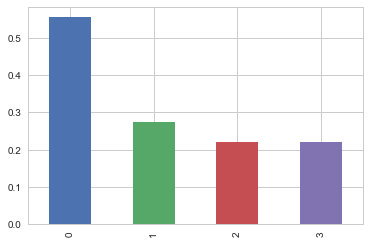

In [0]:
concat_result_epochs.mean(axis=1).plot(kind='bar')
print("100 is the ideal number of EPOCHS for the problem with lower STD")

### Plotting results with best fit model

In [0]:
model_best = Sequential()
model_best.add(LSTM(5, batch_input_shape= (1,x_train_reshaped.shape[1],x_train_reshaped.shape[2]),activation='relu',return_sequences=False))

model_best.add(Dense(1))
model_best.add(Dropout(0.2))
model_best.add(Dense(5))
model_best.add(Dropout(0.1))
model_best.add(Dense(1))
model_best.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

model_best.summary()

history = model_best.fit(x_train_reshaped,y_train_array,epochs=100, batch_size=1, verbose=0, shuffle=False)

y_predict_best = model_best.predict(x_test_reshaped)
rmse_best = sqrt(mean_squared_error(y_test,y_predict_best))
rmse_best

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_225 (LSTM)              (1, 5)                    220       
_________________________________________________________________
dense_450 (Dense)            (1, 1)                    6         
_________________________________________________________________
dropout_449 (Dropout)        (1, 1)                    0         
_________________________________________________________________
dense_451 (Dense)            (1, 5)                    10        
_________________________________________________________________
dropout_450 (Dropout)        (1, 5)                    0         
_________________________________________________________________
dense_452 (Dense)            (1, 1)                    6         
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


0.3785870617691236

In [0]:
scaled_test.shape
scaled_test
ypred_best_df=pd.DataFrame(y_predict_best)
ypred_best_df


array_best=pd.concat([scaled_test.iloc[:,0:-1], ypred_best_df], axis=1)
inverted_best = pd.DataFrame(scaler.inverse_transform(array_best))
inverted_best

inverted_best.iloc[:,-1]
y_old_best=y
y_old_best.reset_index(inplace=True)

final_df_best=pd.concat([y_old_best,inverted_best.iloc[:,-1]], axis=1)
final_df_best.head()


(5, 6)

,0,1,2,3,4,5
0,-0.804283,0.083817,0.596026,1.120633,2.0,-0.804283
1,-1.167851,0.346873,0.809405,1.323796,-0.5,-1.167851
2,-0.263365,0.615088,1.021759,-0.814810,-0.5,-0.263365
3,0.658856,0.882012,-1.213595,-0.814810,-0.5,0.658856
4,1.576643,-1.927790,-1.213595,-0.814810,-0.5,1.576643


,0
0,-0.705082
1,-0.988306
2,-0.322213
3,0.345706
4,0.819650


,0,1,2,3,4,5
0,1642.0,1560.0,1764.0,1972.0,2179.0,1664.373903
1,1560.0,1764.0,1972.0,2179.0,0.0,1600.494992
2,1764.0,1972.0,2179.0,0.0,0.0,1750.727261
3,1972.0,2179.0,0.0,0.0,0.0,1901.371307
4,2179.0,0.0,0.0,0.0,0.0,2008.265987


0    1664.373903
1    1600.494992
2    1750.727261
3    1901.371307
4    2008.265987
Name: 5, dtype: float64

,index,date,item_cnt_day,T_1,T_2,T_3,T_4,T_5,5
0,0,2015-08-04,1642.0,1642.0,1560.0,1764.0,1972.0,2179.0,1664.373903
1,1,2015-08-05,1560.0,1560.0,1764.0,1972.0,2179.0,0.0,1600.494992
2,2,2015-08-06,1764.0,1764.0,1972.0,2179.0,0.0,0.0,1750.727261
3,3,2015-08-07,1972.0,1972.0,2179.0,0.0,0.0,0.0,1901.371307
4,4,2015-08-08,2179.0,2179.0,0.0,0.0,0.0,0.0,2008.265987


Text(0.5,1,'Best Fit Model: LSTM Prediction vs Actual Sales for 5 days between 4th - 8th of August 2015')

Text(0.5,0,'Dates')

([<matplotlib.axis.XTick at 0x1f6312f90f0>,
 <a list of 5 Text xticklabel objects>)

(array([1500., 1600., 1700., 1800., 1900., 2000., 2100., 2200., 2300.]),
 <a list of 9 Text yticklabel objects>)

Text(0,0.5,'Sales of next 5 days')

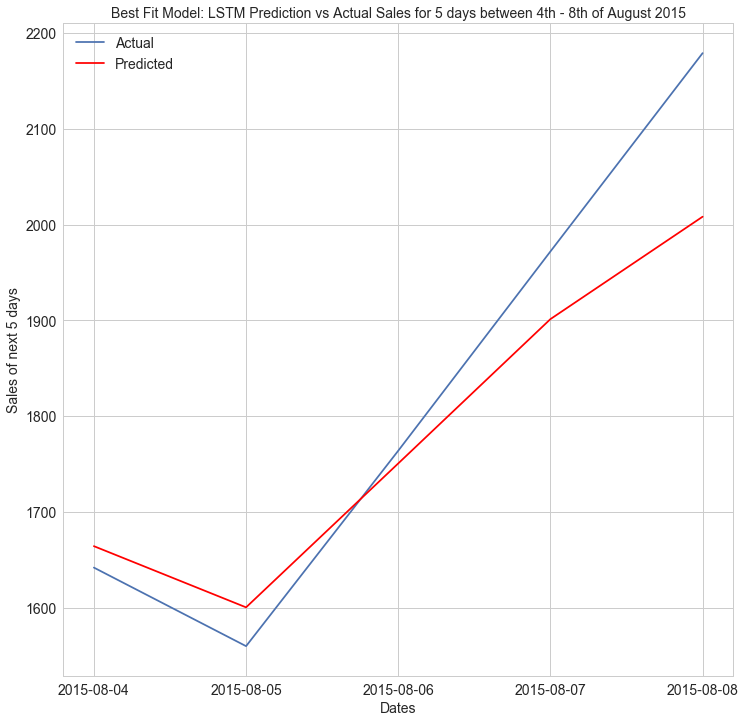

In [0]:

fig, ax = plt.subplots(figsize=(12,12))
ax.plot(final_df_best['date'], final_df_best.item_cnt_day, label='Actual')
ax.plot(final_df_best['date'], final_df_best.iloc[:,-1], label='Predicted',color='red')
plt.title('Best Fit Model: LSTM Prediction vs Actual Sales for 5 days between 4th - 8th of August 2015',fontsize=14)
plt.xlabel('Dates',fontsize=14)
plt.xticks(final_df_best['date'],fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Sales of next 5 days',fontsize=14)

ax.legend(fontsize=14)
plt.show()

## Prediction on Out of Sample data next 5 days

In [0]:
validation_test=validation['2015-08-09':'2015-08-13']
#Contains 1 day of data that we want to predict


validation_test.reset_index(inplace=True)
validation_test = validation_test.groupby([validation_test.date.apply(lambda x: x.strftime('%Y-%m-%d'))]).sum().reset_index()

validation_test.shape

validation_test.head()


(5, 10)

,date,quarter,year,date_block_num,shop_id,item_id,item_category_id,item_price,item_cnt_day,city_cat
0,2015-08-09,4665,3133325,48205,53366,17074126,66351,1.483656e+06,1702.0,24610
1,2015-08-10,4839,3250195,50003,53992,17499358,68889,1.538569e+06,1854.0,24800
2,2015-08-11,4710,3163550,48670,51102,17015008,67476,1.426083e+06,1731.0,23988
3,2015-08-12,4584,3078920,47368,50155,16546374,65239,1.356025e+06,1696.0,23628
4,2015-08-13,4833,3246165,49941,52952,17629867,68508,1.412296e+06,1765.0,26302


In [0]:
for i in range(0,t1_future_predict_period):
    validation_test["T_" + str(i+1)] = validation_test.item_cnt_day.shift(-i)
validation_test.fillna(0.0, inplace=True)

# Rearraning training data 
test_val = validation_test[['T_1','T_2','T_3','T_4','T_5', 'item_cnt_day']] 

test_val.head()

,T_1,T_2,T_3,T_4,T_5,item_cnt_day
0,1702.0,1854.0,1731.0,1696.0,1765.0,1702.0
1,1854.0,1731.0,1696.0,1765.0,0.0,1854.0
2,1731.0,1696.0,1765.0,0.0,0.0,1731.0
3,1696.0,1765.0,0.0,0.0,0.0,1696.0
4,1765.0,0.0,0.0,0.0,0.0,1765.0


In [0]:
test_val
test_val.shape
test_val.head()

#scaling on new Validation data: 
scaler_test_val=StandardScaler()
scaled_test_val= pd.DataFrame(scaler_test_val.fit_transform(test_val.iloc[:,0:6]))
scaled_test_val.head()
scaled_test_val.shape

,T_1,T_2,T_3,T_4,T_5,item_cnt_day
0,1702.0,1854.0,1731.0,1696.0,1765.0,1702.0
1,1854.0,1731.0,1696.0,1765.0,0.0,1854.0
2,1731.0,1696.0,1765.0,0.0,0.0,1731.0
3,1696.0,1765.0,0.0,0.0,0.0,1696.0
4,1765.0,0.0,0.0,0.0,0.0,1765.0


(5, 6)

,T_1,T_2,T_3,T_4,T_5,item_cnt_day
0,1702.0,1854.0,1731.0,1696.0,1765.0,1702.0
1,1854.0,1731.0,1696.0,1765.0,0.0,1854.0
2,1731.0,1696.0,1765.0,0.0,0.0,1731.0
3,1696.0,1765.0,0.0,0.0,0.0,1696.0
4,1765.0,0.0,0.0,0.0,0.0,1765.0


,0,1,2,3,4,5
0,-0.825583,0.629534,0.816619,1.183658,2.0,-0.825583
1,1.810733,0.455450,0.775352,1.265021,-0.5,1.810733
2,-0.322602,0.405914,0.856707,-0.816226,-0.5,-0.322602
3,-0.929648,0.503571,-1.224339,-0.816226,-0.5,-0.929648
4,0.267100,-1.994468,-1.224339,-0.816226,-0.5,0.267100


(5, 6)

In [0]:

x_test_val=scaled_test_val.iloc[:,0:-1]
x_test_val.head()
x_test_val.shape

y_test_val=scaled_test_val.iloc[:,-1]
y_test_val.head()
y_test_val.shape

#Reshaping
 
x_test_val_array=x_test_val.values

x_test_val_reshaped=x_test_val_array.reshape(x_test_val_array.shape[0],1,x_test_val_array.shape[1])
x_test_val_reshaped.shape

,0,1,2,3,4
0,-0.825583,0.629534,0.816619,1.183658,2.0
1,1.810733,0.455450,0.775352,1.265021,-0.5
2,-0.322602,0.405914,0.856707,-0.816226,-0.5
3,-0.929648,0.503571,-1.224339,-0.816226,-0.5
4,0.267100,-1.994468,-1.224339,-0.816226,-0.5


(5, 5)

0   -0.825583
1    1.810733
2   -0.322602
3   -0.929648
4    0.267100
Name: 5, dtype: float64

(5,)

(5, 1, 5)

In [0]:
# Validation Model
y_predict_val = model_best.predict(x_test_val_reshaped)
y_predict_val

array([[-0.7600594 ],
       [ 1.2880316 ],
       [-0.3681147 ],
       [-0.98387975],
       [ 0.19931641]], dtype=float32)

In [0]:
scaled_test_val.shape
scaled_test_val
ypred_val_df=pd.DataFrame(y_predict_val)
ypred_val_df


array_val=pd.concat([scaled_test_val.iloc[:,0:-1], ypred_val_df], axis=1)
inverted_val = pd.DataFrame(scaler_test_val.inverse_transform(array_val))
inverted_val

inverted_val.iloc[:,-1]
y_validaion_old=validation_test
y_validaion_old.reset_index(inplace=True)

final_val_best=pd.concat([y_validaion_old,inverted_val.iloc[:,-1]], axis=1)
final_val_best.head()


(5, 6)

,0,1,2,3,4,5
0,-0.825583,0.629534,0.816619,1.183658,2.0,-0.825583
1,1.810733,0.455450,0.775352,1.265021,-0.5,1.810733
2,-0.322602,0.405914,0.856707,-0.816226,-0.5,-0.322602
3,-0.929648,0.503571,-1.224339,-0.816226,-0.5,-0.929648
4,0.267100,-1.994468,-1.224339,-0.816226,-0.5,0.267100


,0
0,-0.760059
1,1.288032
2,-0.368115
3,-0.983880
4,0.199316


,0,1,2,3,4,5
0,1702.0,1854.0,1731.0,1696.0,1765.0,1705.777845
1,1854.0,1731.0,1696.0,1765.0,0.0,1823.863035
2,1731.0,1696.0,1765.0,0.0,0.0,1728.375896
3,1696.0,1765.0,0.0,0.0,0.0,1692.873210
4,1765.0,0.0,0.0,0.0,0.0,1761.091831


0    1705.777845
1    1823.863035
2    1728.375896
3    1692.873210
4    1761.091831
Name: 5, dtype: float64

,index,date,quarter,year,date_block_num,shop_id,item_id,item_category_id,item_price,item_cnt_day,city_cat,T_1,T_2,T_3,T_4,T_5,5
0,0,2015-08-09,4665,3133325,48205,53366,17074126,66351,1.483656e+06,1702.0,24610,1702.0,1854.0,1731.0,1696.0,1765.0,1705.777845
1,1,2015-08-10,4839,3250195,50003,53992,17499358,68889,1.538569e+06,1854.0,24800,1854.0,1731.0,1696.0,1765.0,0.0,1823.863035
2,2,2015-08-11,4710,3163550,48670,51102,17015008,67476,1.426083e+06,1731.0,23988,1731.0,1696.0,1765.0,0.0,0.0,1728.375896
3,3,2015-08-12,4584,3078920,47368,50155,16546374,65239,1.356025e+06,1696.0,23628,1696.0,1765.0,0.0,0.0,0.0,1692.873210
4,4,2015-08-13,4833,3246165,49941,52952,17629867,68508,1.412296e+06,1765.0,26302,1765.0,0.0,0.0,0.0,0.0,1761.091831


In [0]:
final_df_best

,index,date,item_cnt_day,T_1,T_2,T_3,T_4,T_5,5
0,0,2015-08-04,1642.0,1642.0,1560.0,1764.0,1972.0,2179.0,1664.373903
1,1,2015-08-05,1560.0,1560.0,1764.0,1972.0,2179.0,0.0,1600.494992
2,2,2015-08-06,1764.0,1764.0,1972.0,2179.0,0.0,0.0,1750.727261
3,3,2015-08-07,1972.0,1972.0,2179.0,0.0,0.0,0.0,1901.371307
4,4,2015-08-08,2179.0,2179.0,0.0,0.0,0.0,0.0,2008.265987


In [0]:
final_df_best.iloc[:,1]

0    2015-08-04
1    2015-08-05
2    2015-08-06
3    2015-08-07
4    2015-08-08
Name: date, dtype: object

In [0]:
predicted_five=final_df_best.iloc[:,1]
predicted_five=pd.DataFrame(predicted_five)
predicted_five=pd.concat([predicted_five,final_df_best.iloc[:,-1]],axis=1)
predicted_five.loc[5]='2015-08-09'
predicted_five.loc[5][1]=1697.67906
predicted_five

forcast_five=final_val_best.iloc[:,1]
forcast_five=pd.DataFrame(forcast_five)
forcast_five=pd.concat([forcast_five,final_val_best.iloc[:,-1]],axis=1)
forcast_five

,date,5
0,2015-08-04,1664.37
1,2015-08-05,1600.49
2,2015-08-06,1750.73
3,2015-08-07,1901.37
4,2015-08-08,2008.27
5,2015-08-09,1697.68


,date,5
0,2015-08-09,1705.777845
1,2015-08-10,1823.863035
2,2015-08-11,1728.375896
3,2015-08-12,1692.873210
4,2015-08-13,1761.091831


In [0]:
t1_group.tail()

,item_cnt_day
date,
2015-08-04,1642.0
2015-08-05,1560.0
2015-08-06,1764.0
2015-08-07,1972.0
2015-08-08,2179.0


Text(0.5,1,'Best Fit Model: LSTM Prediction vs Forcast Sales for 5 days between 4th - 13th of August 2015')

Text(0.5,0,'Dates')

([<matplotlib.axis.XTick at 0x1f62ec01240>,
 <a list of 11 Text xticklabel objects>)

Text(0,0.5,'Sales of next 10 days')

(array([1550., 1600., 1650., 1700., 1750., 1800., 1850., 1900., 1950.,
        2000., 2050.]), <a list of 11 Text yticklabel objects>)

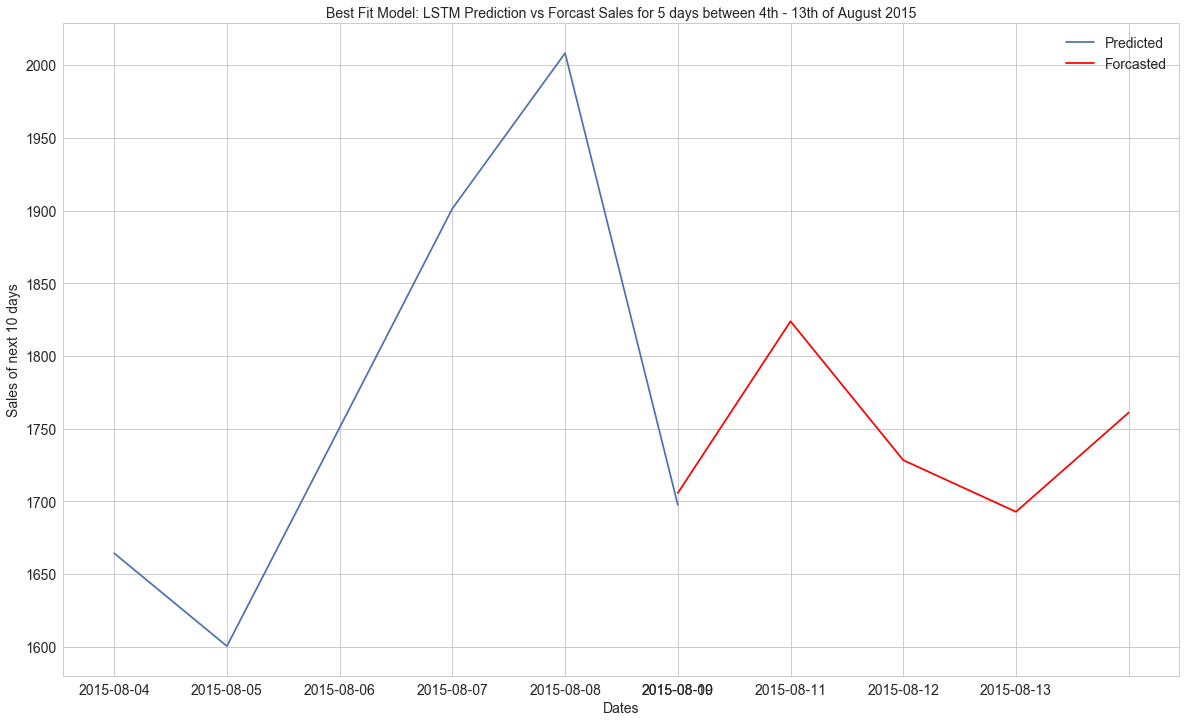

In [0]:

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(predicted_five['date'], predicted_five.iloc[:,-1], label='Predicted')
ax.plot(forcast_five['date'], forcast_five.iloc[:,-1], label='Forcasted',color='red')
plt.title('Best Fit Model: LSTM Prediction vs Forcast Sales for 5 days between 4th - 13th of August 2015',fontsize=14)
plt.xlabel('Dates',fontsize=14)
plt.xticks(pd.concat([predicted_five['date'],forcast_five['date']],axis=0),fontsize=14)
plt.ylabel('Sales of next 10 days',fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=14)
plt.show()

In [0]:
x.head()

last_60=x
last_60.head()

,item_cnt_day,T_1,T_2,T_3,T_4,T_5
date,,,,,,
2015-06-05,2295.0,2295.0,2448.0,2096.0,1708.0,2026.0
2015-06-06,2448.0,2448.0,2096.0,1708.0,2026.0,2140.0
2015-06-07,2096.0,2096.0,1708.0,2026.0,2140.0,2623.0
2015-06-08,1708.0,1708.0,2026.0,2140.0,2623.0,2690.0
2015-06-09,2026.0,2026.0,2140.0,2623.0,2690.0,2235.0


,item_cnt_day,T_1,T_2,T_3,T_4,T_5
date,,,,,,
2015-06-05,2295.0,2295.0,2448.0,2096.0,1708.0,2026.0
2015-06-06,2448.0,2448.0,2096.0,1708.0,2026.0,2140.0
2015-06-07,2096.0,2096.0,1708.0,2026.0,2140.0,2623.0
2015-06-08,1708.0,1708.0,2026.0,2140.0,2623.0,2690.0
2015-06-09,2026.0,2026.0,2140.0,2623.0,2690.0,2235.0


In [0]:
last_60.reset_index(inplace=True)
#last_60=last_60.iloc[:,1:2]last_60
last_60=last_60.iloc[:,0:2]
last_60.head()


,date,item_cnt_day
0,2015-06-05,2295.0
1,2015-06-06,2448.0
2,2015-06-07,2096.0
3,2015-06-08,1708.0
4,2015-06-09,2026.0


In [0]:
last_60.head()
last_60.loc[61]='2015-08-09'
last_60.loc[61][1]=1697.679060
last_60.tail()

,date,item_cnt_day
0,2015-06-05,2295.0
1,2015-06-06,2448.0
2,2015-06-07,2096.0
3,2015-06-08,1708.0
4,2015-06-09,2026.0


,date,item_cnt_day
56,2015-07-31,1796
57,2015-08-01,1953
58,2015-08-02,1771
59,2015-08-03,1659
61,2015-08-09,1697.68


In [0]:
last_60.reset_index(inplace=True)

Text(0.5,1,'Best Fit Model: LSTM Prediction vs Actual Sales for 65 days')

Text(0.5,0,'Dates')

([<matplotlib.axis.XTick at 0x1f62eb14e48>,
 <a list of 66 Text xticklabel objects>)

Text(0,0.5,'Sales')

(array([1600., 1800., 2000., 2200., 2400., 2600., 2800., 3000.]),
 <a list of 8 Text yticklabel objects>)

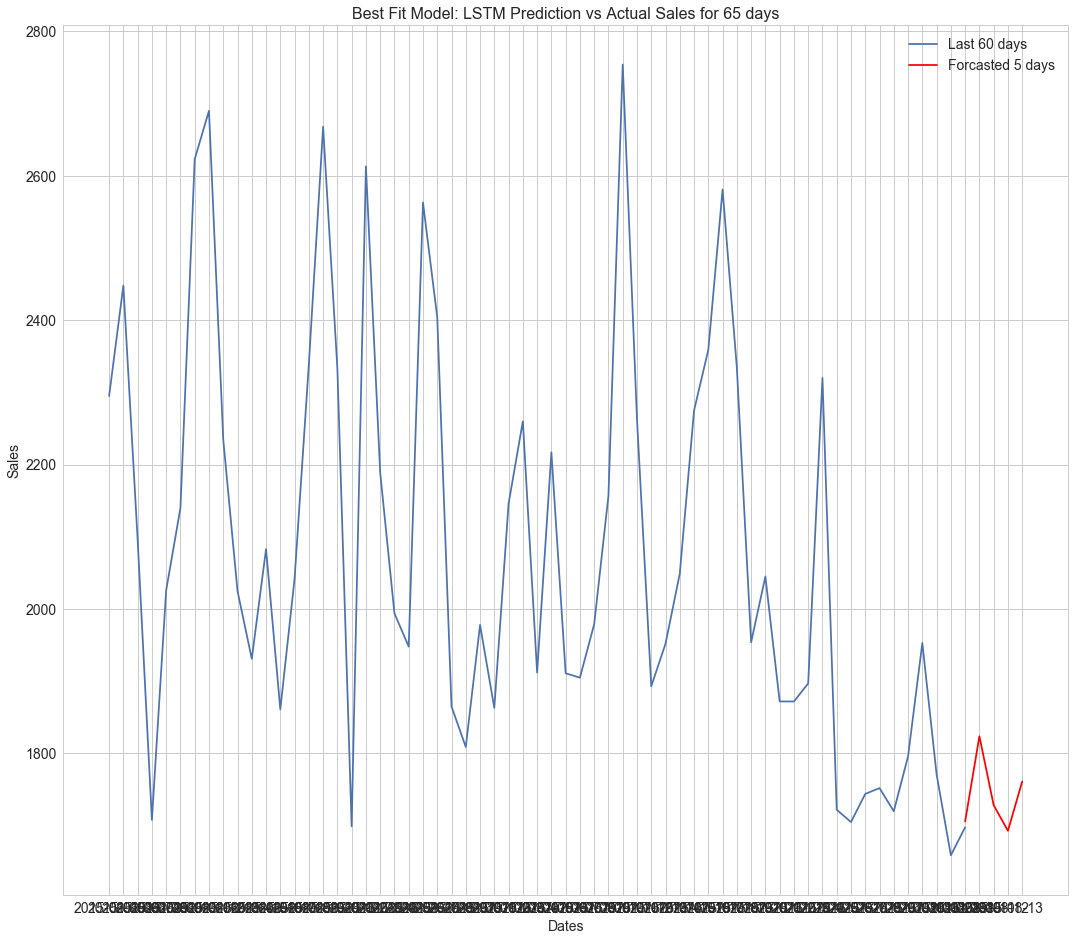

In [0]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(18,16))
ax.plot(last_60['date'], last_60.iloc[:,-1], label='Last 60 days')
ax.plot(forcast_five['date'], forcast_five.iloc[:,-1], label='Forcasted 5 days',color='red')
plt.title('Best Fit Model: LSTM Prediction vs Actual Sales for 65 days',fontsize=16 )
plt.xlabel('Dates',fontsize=14)
plt.xticks(pd.concat([last_60['date'],forcast_five['date']],axis=0),fontsize=14)
 
plt.ylabel('Sales',fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=14)
plt.show()

## Task 2 (Multivariate Analysis): Preparing data for sales by shops (GRANUALITY SHOP BY MONTH)

Our relevant columns become date , item_cnt_day and shops (number of products sold on date)

In [0]:
t2 = sales_train_new.groupby([sales_train_new.date.apply(lambda x: x.strftime('%Y-%m')),'shop_id']).sum().reset_index()
t2 = t2[['date','shop_id','item_cnt_day']]
t2["item_cnt_day"].clip(0.,20.,inplace=True)
t2 = t2.pivot_table(index=['shop_id'], columns='date',values='item_cnt_day',fill_value=0).reset_index()

AttributeError: 'DataFrame' object has no attribute 'date'

In [0]:
# Each shop having 33 months as columns
t2.head()
t2.shape

### Four our Task two:

1. Our SEQ is going to be last 30 months of shop wise data
2. our Future Period Prediction is how many months will we will predict sales for shop so (1 month)

In [0]:
#months
t2_seq_length=30
t2_future_predict_period=1

#ShopID for specific shop learning
t2_shopid=False 